# <center><font color='#1a75ff'>Analyzing borrowers’ risk of defaulting</font></center>

<center><img src="loan.jpg"></center>

### Contents <a class="anchor" id="contents"></a>

* [Project description](#Project_description)
<p> </p> 
* [Part 1. Loading libraries and dataset](#Part_1)
    * [Conclusion](#Conclusion_Part_1)
<p> </p>     
* [Part 2. Preparation the data](#Part_2)
    * [Processing missing values](#Part2step1)
    * [Processing duplicates](#Part2step2)
    * [Conclusion](#Conclusion_Part_2)
<p> </p>    
* [Part 3. Exploratory Analysis](#Part_3)
    * [Conclusion](#Conclusion_Part_3)
<p> </p>     
* [General Conclusion](#General_Conclusion)

## Project description <a class="anchor" id="Project_description"></a>

This project is to prepare a report for a bank’s loan division. The report will be considered when building a credit scoring of a potential customer. 
A credit scoring is used to evaluate the ability of a potential borrower to repay their loan.

As we know, the default is the failure to repay a debt including interest or principal on a loan or security. A default can occur when a borrower is unable to make timely payments, misses payments, or avoids or stops making payments.

**The project finds out if a customer’s marital status and number of children has an impact on whether they will default on a loan.** 

The bank already has some data on customers’ credit worthiness.

## Part 1. Loading libraries and dataset <a class="anchor" id="Part_1"></a>
[Go back to the Contents](#contents)

First, let's load the libraries required for data manipulation and analysis.

In [1]:
#import packages for data manipulations
import pandas as pd
import numpy as np

#import packages for data plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
#import packages for splitting a sample of text into words
import nltk
from nltk.tokenize import word_tokenize

Now we are looking at the content of the data file.

In [2]:
#the source of data:
data = pd.read_csv("credit_scoring_eng.csv")

The file consist information about loan borrowers, namely
- the number of children in the family
- how long the customer has worked
- the customer’s age
- the customer’s education level
- the customer’s marital status
- the customer’s gender
- the customer’s income type
- an annual income
- whether the client has ever defaulted on a loan
- a reason for taking out a loan

Let's take a look at the dataset structure.

In [3]:
#change some field names for the convenience of working with data
data.rename(columns={'dob_years': 'age','debt':'debt_occured','purpose':'purpose_of_loan'
                   ,'family_status':'marital_status', 'family_status_id':'marital_status_id'}, inplace=True)

#the structure of our dataset
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   children           21525 non-null  int64  
 1   days_employed      19351 non-null  float64
 2   age                21525 non-null  int64  
 3   education          21525 non-null  object 
 4   education_id       21525 non-null  int64  
 5   marital_status     21525 non-null  object 
 6   marital_status_id  21525 non-null  int64  
 7   gender             21525 non-null  object 
 8   income_type        21525 non-null  object 
 9   debt_occured       21525 non-null  int64  
 10  total_income       19351 non-null  float64
 11  purpose_of_loan    21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 8.2 MB


The data file has 21525 rows (each one is a separate loan) and 12 columns of customer and loan properties. <br>

The values of *Non-Null Count* column shows us that almost all fields of dataset are filled, except two of them: *days_employed* and *total_income*. These two have Nan values in the rows.<br>
By the meaning, only one column *days_employed* has the wrong type of data. The number of days must be an integer.

In [4]:
#this function returns the first 10 rows for quickly testing of our data
data.head(10)

,children,days_employed,age,education,education_id,marital_status,marital_status_id,gender,income_type,debt_occured,total_income,purpose_of_loan
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


### Conclusion. <a class="anchor" id="Conclusion_Part_1"></a>

At first glance, the column *days_employed* has more tricky data. It consists negative values.

Some of data has uppercase characters in a string. Therefore, to reduce variability of data we convert string values into lowercase.

Our dataset has quantitative and categorical variables.<br>
It is a good practice to use Label Encoding for categorical variables where each unique category(label) is mapped to an integer. This improves data quality and reduces the size of dataset.
Our dataset already has two encoded objects: *edication* and *marital_status*. We should check that the connection was  built correctly.

Probably we will want to use Label Encoding to *purpose_of_loan* column and to try dimensionality reduction if it nessesary.

At this step, we got a view of data, estimated the amount of data, considered data types, found fields containing empty values and checked the presence of anomalous data in the fields.

## Part 2. Preparation the data <a class="anchor" id="Part_2"></a>
[Go back to the Contents](#contents)

Let's go deeper and get rid of artifacts, fill in the missing data, find patterns in the data and define relationships within the data for further analysis.

Anomalies or outliers occur for different reasons. As example, 
- from many sources, data came in various formats that are poorly compatible and give errors in the general dataset;
- errors were made on manual data entry;
- a data flaw also can be caused by software and hardware errors and etc.

One way to analyze anomalies is by looking at the statistics of a column using the describe method.

In [5]:
#basic statistical details of numeric values
data.describe()

,children,days_employed,age,education_id,marital_status_id,debt_occured,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


These are quantitative variables.<br>
Let's explore.
- Children column has negative (-1) and extremely high (20) values
- Days_employed column has negative (-18388.949901) and extremely high (401755.400475) values
- Age column has zero values
- Total_income has extremely high (362496.645) value 

We must be sure that indeed these values are invalidate data, errors, outliers or typos.

### Processing missing values <a class="anchor" id="Part2step1"></a>

Let's go through the data structure one by one, analyze the contents of each column, paying attention to the anomalies that we found earlier.

- **CHILDREN**

As we saw above, this column contains two unclear values -1 and 20. Let's see the data distribution on the graph.

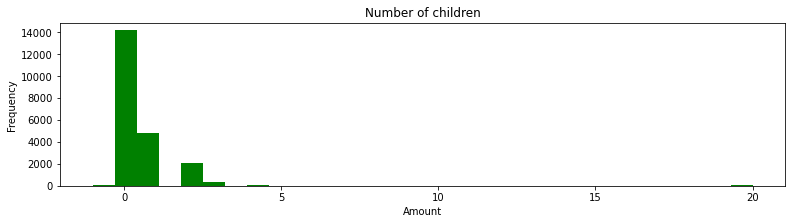

In [6]:
#plot the distribution of number of children
plt.figure(figsize=(13,3))
plt.hist(data['children'], bins= 30, color='green')
plt.title('Number of children'); plt.xlabel('Amount'); plt.ylabel('Frequency');

The number of children cannot be less than 0, therefore -1 is a clear error.<br>
20 is a data point that lies outside the overall pattern in a distribution. So this is an outlier

In [7]:
#percentage of values in the sample
data['children'].value_counts() / data.shape[0] * 100

 0     65.732869
 1     22.383275
 2      9.547038
 3      1.533101
 20     0.353078
-1      0.218351
 4      0.190476
 5      0.041812
Name: children, dtype: float64

The percentage number of such values in the sample is 0.2% for the value -1 and 0.3% for the value 20. That is a pretty minuscule amount.<br>
These values increase the variability in data, which decreases statistical power. Also number of children is significant values for our task.<br>
For that reasons we will exclude values -1 and 20 from further analysis.

In [8]:
#dataset for further analysis
customers = data.loc[(data['children']>=0) & (data['children']<20)]

Since the abnormal data in the column "children" can be the result of 
 input-output errors and, analyzing the contents of other attributes of the rows, one of the solutions to the problem can be:
- remove the minus sign for -1 using the abs () function
- replace the outlier value (20) with the average value of the children in the sample.

The next column:
- **AGE**

This column has values equal to zero.
However, the customer’s age cannot be zero, so we’ll see the distribution and decide what to do.

In [9]:
print('Number of customers with zero age:', customers[customers['age']==0]['age'].count())

Number of customers with zero age: 100


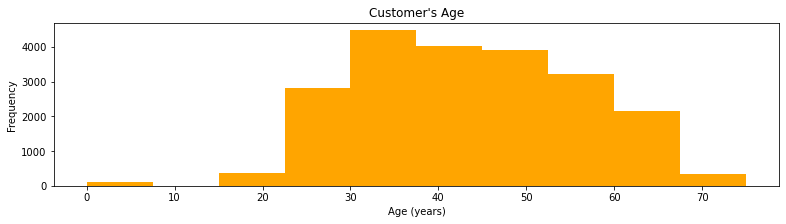

In [10]:
#plot
plt.figure(figsize=(13,3))
plt.hist(customers['age'], bins=10, color='orange');
plt.title("Customer's Age"); plt.xlabel('Age (years)'); plt.ylabel('Frequency');

As we can see on histogram, zero values is numerically distant from most of the other data points in a set of data.
It mean, that age data has an outlier.

The number of rows with an outlier value is only is a hundred and the age data distribution in the dataset is skewed. Using the median to replace the zero value is a possible solution. This will save the data in the sample.

In [11]:
#avoid SettingWithCopyWarning error
customers = customers.copy()

#median of ages
median_age = int(customers['age'].median())
print('Median of ages: ', median_age)

#replace
customers.loc[customers['age'] == 0, 'age'] = median_age

Median of ages:  42


- **DAYS_EMPLOYED**

This column has a lot of problems. Firstly, there are both negative and positive values.

Let's use a discribe method to compare the positive and negative sets of values.

In [12]:
#Positive values
#transform days to years
(customers[customers['days_employed']>=0]['days_employed'] / 365).describe()

count    3431.000000
mean     1000.070963
std        57.773886
min       900.626632
25%       949.724236
50%      1000.785268
75%      1050.117236
max      1100.699727
Name: days_employed, dtype: float64

Even the minimum value here is about 900 years. It seems anomalous set was detected.<br> 
The number of such values is pretty big: 3431

In [13]:
#Negative values
#transform days to years and get rid of negative numbers
(customers[customers['days_employed']<0]['days_employed'] / 365 * (-1)).describe()

count    15809.000000
mean         6.448367
std          6.313862
min          0.066141
25%          2.073477
50%          4.466969
75%          8.651383
max         50.380685
Name: days_employed, dtype: float64

The minimum value is about zero, the maximum is about fifty. This dataset looks trustworthy. 

The minimum value in the selection is 0.066141 years. If we round the years up, then the clients who had any work experience will get a value more than zero. 

So, as a solution, we will translate days into years and flip negative to positive;<br>
round a number of years up to its nearest whole value;<br>
and replace abnormal values and NaN with zero.

Since the number of anomalous values is quite large and this column is not used to answer the task, we derive the number of years in a separate integer column where all values are defined and consistent. In this case, the field can be used later for further analysis.

It should be noted that during the transformation in years and getting rid of the minus, the dataset with abnormal values does not intersect with normal ones, because the minimum value in it is 900 years.

Also we will make sure that the experience does not exceed the age of the borrower.

In [14]:
# avoid SettingWithCopyWarning of Pandas
customers = customers.copy()

#create a new column "years_employed", round up, fill the NaN with zero
customers['years_employed'] = np.ceil(customers['days_employed'].fillna(0) / (-365)) 
#Data type replacement
customers['years_employed'] = customers['years_employed'].astype(int)

#replace the anomalous values with zero
customers.loc[customers['years_employed'] < 0, 'years_employed'] = 0

#check work experience and age
print('Number of rows with anomalous work experience ', 
      customers[customers['years_employed'] >= customers['age']]['years_employed'].count())

Number of rows with anomalous work experience  0


- **TOTAL_INCOME**

*Total_income* column has a very high (=362496.645000) value.<br>
We woild like to be sure that this is not an outlier.

Let's see the distribution of total income.

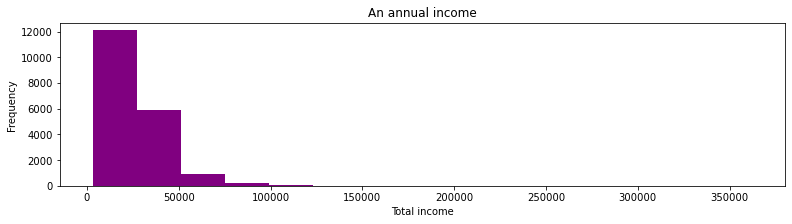

In [15]:
#plot
plt.figure(figsize=(13,3))
plt.hist(customers[customers['total_income']>0]['total_income'], bins=15, color='purple')
plt.title('An annual income'); plt.xlabel('Total income'); plt.ylabel('Frequency');

The value lies on an abnormal distance from other values. But since it’s about revenue, we have to be careful with the decision to eliminate outlier.<br> An outlier may indicate bad data. Let's check.

In [16]:
#check the tail
customers[customers['total_income'] > 300000].T

,12412,19606
children,0,1
days_employed,-1477.44,-2577.66
age,44,39
education,bachelor's degree,bachelor's degree
education_id,0,0
marital_status,married,married
marital_status_id,0,0
gender,M,M
income_type,business,business
debt_occured,0,1


The type of income of the borrower is a business, a loan request is related to real estate and property. The data looks reliable.<br>
In addition, as we saw above, the column contains NaN. The selection shows that "total_income" and "days_employed" columns have NaN values in the same rows. Perhaps they came to the dataset from a source that did not record this data.
 
However, total income may be significant for our analysis, therefore, we will fill the Nan values with zero. And perhaps, we will divide this data into categories later.

In [17]:
#fill the NaN with zero 
customers['total_income'] = customers['total_income'].fillna(0)
print("An undefined total income: ", customers[customers['total_income'].isnull()]['total_income'].count())

An undefined total income:  0


- **MARITAL_STATUS and EDUCATION**

The *edication* column and *marital_status* are labels for *education_id* and *marital_status_id* respectively.<br>
We will verify that ID is correctly linked to the labels and convert the values to the lower case.

In [18]:
#marital status
df_mstat= customers.drop_duplicates(['marital_status','marital_status_id'])[['marital_status','marital_status_id']]
df_mstat.reset_index(drop=True)

,marital_status,marital_status_id
0,married,0
1,civil partnership,1
2,widow / widower,2
3,divorced,3
4,unmarried,4


*marital_status_id* is a valid label for *marital_status*

In [19]:
#education
#convert to the lower case
customers['education'] = customers['education'].str.lower()
df_edu = customers.drop_duplicates(['education','education_id'])[['education','education_id']]
df_edu.reset_index(drop=True)

,education,education_id
0,bachelor's degree,0
1,secondary education,1
2,some college,2
3,primary education,3
4,graduate degree,4


*education_id* is a valid label for *education*

- **INCOME_TYPE**

To reduce the dimensionality of the dataset and increase the speed of calculations, we assign the digital equivalent to categorical variables in *income_type* column.

In [20]:
def label_income_type(row):
    #The function returns ID number for label of "income_type" column  
    
    return_value = 0 #unemployed type by default
    
    income_type = row['income_type']
    if income_type == 'employee':
        return_value = 1
    elif income_type == 'retiree':
        return_value = 2
    elif income_type == 'business':
        return_value = 3
    elif income_type == "civil servant":
        return_value = 4
    elif income_type == 'student':
        return_value = 5
    elif income_type == 'entrepreneur':
        return_value = 6
    elif income_type == "paternity/maternity leave":
        return_value = 7

    return return_value

#create a new column "income_type_id"
customers['income_type_id'] = customers.apply(label_income_type, axis=1)

#income type as dataset
df_inctype = customers.drop_duplicates(['income_type','income_type_id'])[['income_type','income_type_id']]
df_inctype.reset_index(drop=True)

,income_type,income_type_id
0,employee,1
1,retiree,2
2,business,3
3,civil servant,4
4,unemployed,0
5,entrepreneur,6
6,student,5
7,paternity / maternity leave,0


- **PURPOSE_OF_LOAN**

Unify the text of the loan request for the convenience of further analysis

In [21]:
def label_purpose_of_loan(row):
    #The function creates labels for "purpose_of_loan" column
    
    return_value = 'undefined' #undefined label
    
    keywords = {'wedding': 'wedding',
                'estate': 'property','property': 'property','house': 'property','housing': 'property',
                'car': 'car', 'cars': 'car',
                'education': 'education', 'educated': 'education', 'university': 'education'
                }

    purpose = row['text_purpose']

    for word, label in keywords.items():
        if word in purpose:
            return_value = label
    return return_value

#create a new column with text divided into words
customers['text_purpose'] = customers['purpose_of_loan'].apply(word_tokenize)

#create column of labels
customers['purpose_id'] = customers.apply(label_purpose_of_loan, axis=1)

#check underfined label
print("Number of underfined labels:", customers[customers['purpose_id'] == 'undefined']['purpose_id'].count())

Number of underfined labels: 0


In [22]:
#labels
customers.groupby('purpose_id')['purpose_id'].count().sort_values(ascending=False)

purpose_id
property     10780
car           4288
education     3997
wedding       2337
Name: purpose_id, dtype: int64

### Processing duplicates <a class="anchor" id="Part2step2"></a>
The final dataset should contain the fields necessary for quick calculations. Duplicate entries must be deleted.

Our dataset has a large number of records and many attributes. We also filled in the empty values and removed the main artifacts. The dataset is quite variable, so we can remove duplicate entries if they occur.

In [23]:
#the final dataset
df = customers[['children', 'age', 'education_id', 'marital_status_id','gender','debt_occured',
                 'total_income','years_employed','income_type_id','purpose_of_loan','purpose_id']].copy()

#delete duplicated rows
df.drop_duplicates(inplace=True)

print('Total count in source data is     ',data.shape[0])
print('Total count of clean data rows is ',df.shape[0])

Total count in source data is      21525
Total count of clean data rows is  21330


### Conclusion <a class="anchor" id="Conclusion_Part_2"></a>

There are three types of missing values:  missing completely at random (MCAR), missing at random (MAR), and missing not at random (MNAR). In our dataset we dealt with MCAR missing values.<br>
All undefined and empty values was replaced with the values corresponding to our main task.

We practically saved the amount of data in the sample. <br> 
For statistical analysis it is better to have a large amount of data. This gives us a better distribution of data and improves the quality of analysis.

## Part 3. Exploratory Analysis<a class="anchor" id="Part_3"></a>
[Go back to the Contents](#contents)

Now we can look at the dependencies and reach some conclusions. Let's find answers on the questions.

- **Is there a relation between having kids and repaying a loan on time?**

In [24]:
def print_result(df_print):
    #this function prints result
    try:
        print('Percentage in the group')
        for key, value in df_print.items():
            print("No debt {:.1%}".format(value[0]) )
            print("Debt    {:.1%}".format(value[1]) )
    except:
        print('No information')
    return
   
#select dataset with children
df_kids= df[df['children']>0][['children','debt_occured']]
#number of rows in the dataset
total= df_kids.shape[0]
print("Total number of customers with children: ", total)
#result by group
print_result(df_kids.groupby('debt_occured').count() / total)
print()

#select dataset without children
df_no_kids= df[(df['children'] ==0)][['children','debt_occured']]
#number of rows in the dataset
total= df_no_kids.shape[0]
print("Total number of customers without children: ", total)
#result by group
print_result(df_no_kids.groupby('debt_occured').count() / total)

Total number of customers with children:  7240
Percentage in the group
No debt 90.8%
Debt    9.2%

Total number of customers without children:  14090
Percentage in the group
No debt 92.5%
Debt    7.5%


In the group of clients with children, the percentage of debtors is slightly higher - by 1.7%

Having dependents means customer has higher commitments, which in turn lower his disposable income. In other words, each additional person increases customer living expenses.

Let's see how the size of income per person affects the repayment of a loan.

In [25]:
def income_label(row):
    #This function returns a label corresponding to the income level
    try:
        income = row['income_per_person']
        if income < 5000:
            level= "less then 5000"
        elif (income >= 5000)&(income < 10000): 
            level= "from 5000 to 10000"
        else:
            level= "more 10000"
    except:
        level= "undefined"
    return level    

In [26]:
#create dataset of customers with kids
df_kids= df[df['children']>0][['children','marital_status_id','total_income','debt_occured']]
#income per person
df_kids['income_per_person'] = round(df_kids['total_income'] /
                   (df_kids['children'] + np.where(df_kids['marital_status_id'] <=1, 2,1))).astype(int)
#string label of income
df_kids['income_level'] = df_kids.apply(income_label, axis=1)

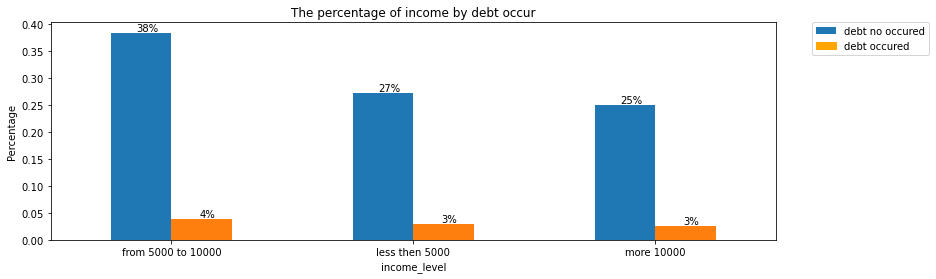

In [27]:
#percentage of income by debt occur
#dataset for plotting
df_s=(pd.pivot_table(df_kids, values='children', index=['debt_occured'], columns=['income_level'], 
               aggfunc='count') / df_kids.shape[0])

#plot
fig, ax = plt.subplots(figsize=(13, 4))
df_s.T.plot(kind='bar', ax=ax)
ax.set(title='The percentage of income by debt occur', ylabel='Percentage');
plt.xticks(rotation=0)
#annotation of bar labels
for p in ax.patches:
        ax.annotate('{:.0%}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()), 
                    ha='center', va='bottom', color= 'black')
green_patch= mpatches.Patch(label='debt no occured')
red_patch= mpatches.Patch(color='orange',label='debt occured')
plt.legend(handles=[green_patch, red_patch], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);        

### Conclusion

Сustomers without children were 1.7% less likely to have difficulty repaying a loan.

However, borrowers with children showed a relation between payments and the level of income per person in the family. Clients with an average income level from 5,000 to 10,000 per person have the highest loan repayment rate.

Next question is
- **Is there a relation between marital status and repaying a loan on time?**

Marital status is a rather volatile attribute. It can change at any time and family income can change in any direction.<br>
Let's see the distribution by groups.

In [28]:
#select customers with a partner 
df_partners= df[df['marital_status_id'] <= 1][['marital_status_id','debt_occured']]
total= df_partners.shape[0]
print("Total number of customers living with a partner:             ", total)
#result by group
print_result(df_partners.groupby('debt_occured').count() / total)
print()

#select customers without a partner 
df_single= df[df['marital_status_id']>1][['marital_status_id','debt_occured']]
total= df_single.shape[0]
print("Total number of customers living without an official partner: ", total)
#result by group
print_result(df_single.groupby('debt_occured').count() / total)

Total number of customers living with a partner:              16394
Percentage in the group
No debt 92.0%
Debt    8.0%

Total number of customers living without an official partner:  4936
Percentage in the group
No debt 91.5%
Debt    8.5%


In this sample there is no relation between having an official partner and ability to repay the loan on time.<br> In detail:

In [29]:
#merge label of marital status
df_marital = df.merge(df_mstat, on='marital_status_id', how='left').copy()
#count marital status, split by debt_occured
df_status = df_marital.groupby(['marital_status','debt_occured'])['marital_status_id'].count()
#count marital status by group
df_status_sum = df_marital.groupby(['marital_status'])['marital_status'].count()

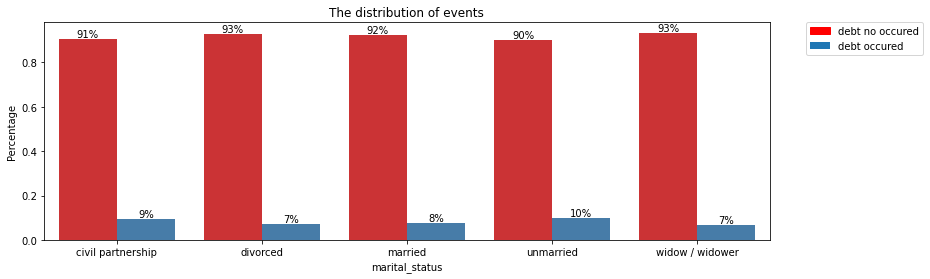

In [30]:
#dataset for plotting
df_s=df_status.div(df_status_sum, level='marital_status').reset_index()

#plot
plt.figure(figsize=(13,4))
ax = sns.barplot(x=df_s['marital_status'], y=df_s[0], hue=df_s['debt_occured']
                 , palette="Set1")
ax.set(title='The distribution of events', ylabel='Percentage');
#annotation of bar labels
for p in ax.patches:
        ax.annotate('{:.0%}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()), 
                    ha='center', va='bottom', color= 'black')
green_patch= mpatches.Patch(color='red', label='debt no occured')
red_patch= mpatches.Patch(label='debt occured')
plt.legend(handles=[green_patch, red_patch], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

### Conclusion

Having a partner does not give big advantages when repaying a loan.<br> But marital status shows that widow / widower repay the loan more often than others. Divorced and married customers on the same level. The largest percentage of debt at  customers with marital status as civil partnership and unmarried.

Our next question is 
- **Is there a relation between income level and repaying a loan on time?**

We will divide total income into several groups to answer this question.<br>
Let's look at the distribution of data in the field 'total_income'

In [31]:
df[df['total_income']>0]['total_income'].describe()

count     19240.000000
mean      26791.806362
std       16496.819745
min        3306.762000
25%       16480.020250
50%       23203.328000
75%       32551.144000
max      362496.645000
Name: total_income, dtype: float64

We select the groups based on the data above.
- low_level (less 16500)
- medium level (from 16500 to 32500)
- high level (more 32500)


In [32]:
def income_level_groups(row):
    #This function return label of total income
    try:
        total_income = row['total_income']
    
        if total_income < 16500:
            level= 'low'
        elif (total_income >= 16500)&(total_income < 32500): 
            level= 'medium'
        else:
            level= 'high'
    except:
        level= 'undefined'
    return level    
 
#create dataset
df_income= df[df['total_income']>0].copy()
#add a group label by income level
df_income['income_level'] = df_income.apply(income_level_groups, axis=1)
#calculates the percentage
df_stat = df_income.groupby(['income_level','debt_occured'])['income_level'].count()
df_sum  = df_income.groupby(['income_level'])['income_level'].count()
df_income_stat = round(df_stat.div(df_sum, level='income_level') * 100, 2)
#result
print("Percentage of LOW level (less 16500) income with no debt                ", df_income_stat['low'][0],"%" )
print("Percentage of MEDIUM level (more than 16500 and less 32500) with no debt", df_income_stat['medium'][0],"%")
print("Percentage of HIGH level (more 32500) income with no debt               ", df_income_stat['high'][0],"%")

Percentage of LOW level (less 16500) income with no debt                 92.06 %
Percentage of MEDIUM level (more than 16500 and less 32500) with no debt 91.25 %
Percentage of HIGH level (more 32500) income with no debt                92.97 %


### Conclusion

Customers with an annual income of over 32,500 repay the loan 2% more often than customers with an average income (from 16,500 to 32,500) and only 1% than customers with a low income level of less than 16,500.
<br>
<br>
The last question is
- **How do different loan purposes affect on-time repayment of the loan?**

Above, we have already identified labels describing the reasons stated for obtaining a loan. These are the following tags:
- wedding
- property
- car
- education

Having grouped the dataset by these labels, we will understand what purpose of the loan has a higher percentage of loan repayment on time.

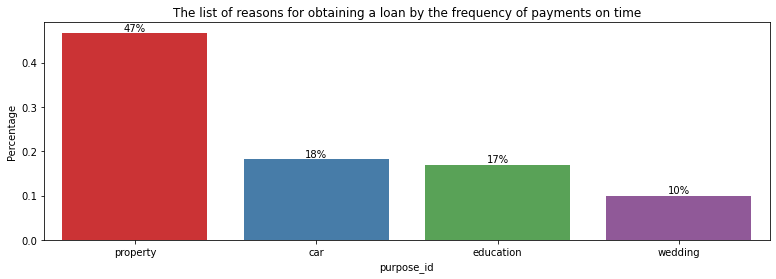

In [33]:
#create dataset of customers without debt occured
df_no_debt = df[df['debt_occured'] == 0].groupby('purpose_id').count()
#percentage
df_purpose = df_no_debt['debt_occured'] / df.shape[0]
#sort descending
df_purpose = df_purpose.sort_values(ascending = False)

#plot
plt.figure(figsize=(13,4))
ax = sns.barplot(x=df_purpose.index, y=df_purpose.values #, hue=df_s['debt_occured']
                 , palette="Set1")
ax.set(title='The list of reasons for obtaining a loan by the frequency of payments on time', ylabel='Percentage');
#annotation of bar labels
for p in ax.patches:
        ax.annotate('{:.0%}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()), 
                    ha='center', va='bottom', color= 'black')

### Conclusion

Customers receiving a loan by the reason connected to property, most often pay it on time.

## General conclusion.<a class="anchor" id="General_Conclusion"></a>

[Go back to the Contents](#contents)

A credit score is a magic number telling lenders our potential credit risk and ability to repay loans. Usually, payment history is one of the basic elements in calculating a credit rating.

To help correctly assess the history of payments and make a fair decision regarding the issuance of a loan, this project conducted a study of the relationship between some key characteristics of customers.

The main task was to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan.

Based on the data obtained for analysis, we tried to identify  relationships, trends, and anomalies.

There are 4 main reasons for obtaining a loan, ranked by loan repayment frequency:
- PROPERTY  
- CAR             
- EDUCATION
- WEDDING

We can say that customers with children have more problems with repaying a loan. However, with an income level per person from 5,000 to 10,000 they show a high level of timely payments.

Also, customers who register a marriage have fewer problems paying a loan on time than customers with civil partnership or unmarried.

In addition, customers with an average annual income are more likely to have debt.